In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


(1, 3, 3, 1)


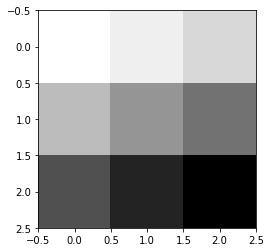

In [69]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

In [4]:
temp_model = keras.layers.Flatten()
temp_model(image)

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=array([[1., 2., 3., 4., 5., 6., 7., 8., 9.]], dtype=float32)>

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

In [9]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
layer_conv = keras.layers.Conv2D(filters = 2, kernel_size=2, padding = 'VALID', kernel_initializer=weight_init)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


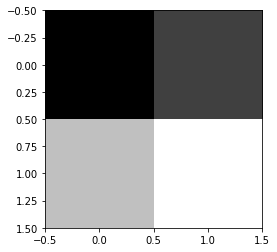

In [10]:
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


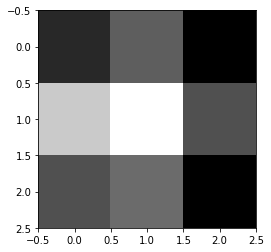

In [5]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

## 3 filters (2,2,1,3)

In [51]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight.shape)
weight

image.shape (1, 3, 3, 1)
(2, 2, 1, 3)


array([[[[ 1., 10., -1.]],

        [[ 1., 10., -1.]]],


       [[[ 1., 10., -1.]],

        [[ 1., 10., -1.]]]])

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


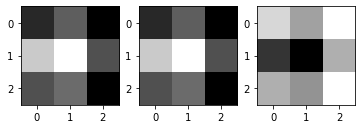

In [6]:
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## !!!주의
* image의 채널- eg. (img_num, row, column, channel) 과 conv2D filter의 dimension의 채널 eg. (row, column, channel, number) 은 같아야 한다. 
* output의 채널은 conv2D filter의 갯수(number)와 같다. eg. output - (image num, row, column, conv2D filter num)

# Let's make multi channel image

tf.Tensor(
[[[[0.11111111 0.31812394 0.82080054]
   [0.22222222 0.74995756 0.9320439 ]
   [0.33333334 0.942099   0.10340035]]

  [[0.44444445 0.56150734 0.126562  ]
   [0.5555556  0.11956382 0.18349564]
   [0.6666667  0.33652794 0.16719377]]

  [[0.7777778  0.70978796 0.4030869 ]
   [0.8888889  0.29455876 0.59144235]
   [1.         0.50761807 0.50109506]]]], shape=(1, 3, 3, 3), dtype=float32)


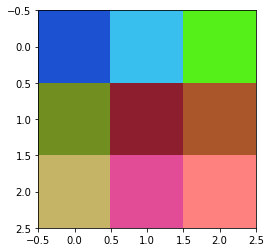

In [70]:
image_1 = image / 9 
image_2 = tf.reshape(tf.random.uniform(shape=(3,3), minval = 0, maxval = 1), shape= (1, 3, 3, 1))
image_3 = tf.reshape(tf.random.uniform(shape=(3,3), minval = 0, maxval = 1), shape= (1, 3, 3, 1))

channel_num = 3
multi_channel_image = tf.stack([image_1, image_2, image_3], axis = 3)
multi_channel_image = tf.reshape(multi_channel_image, shape = (1, 3, 3, channel_num))

print(multi_channel_image)
plt.imshow(multi_channel_image.numpy().reshape(3,3,3))
plt.show()

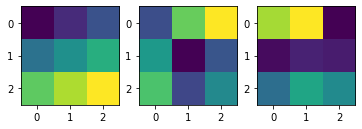

In [71]:
fig, axes = plt.subplots(1, 3)
for i, im in enumerate([image_1, image_2, image_3]):
    axes[i].imshow(im.numpy().reshape(3, 3, 1))

In [73]:
# to get horizontal line
weight_1 = np.array([[1, 1], 
                     [0, 0]])
# to get vertical line
weight_2 = np.array([[0, 1], 
                     [0, 1]])
# to get diagonal line
weight_3 = np.array([[0, 1], 
                     [1, 0]])
filter_num = 1
weight = np.stack((weight_1, weight_2, weight_3), axis = 2)
weight = np.reshape(weight, newshape=(2, 2, channel_num, filter_num))
weight = weight.astype(np.float32)

print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
weight_init

weight.shape (2, 2, 3, 1)


conv2d.shape (1, 3, 3, 1)
[[2.2614605  2.1210785  0.50052714]
 [2.0007052  2.8250043  1.1677618 ]
 [2.5526676  2.897602   1.        ]]


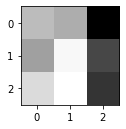

In [74]:
conv2d = keras.layers.Conv2D(filters=filter_num, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(multi_channel_image)
print("conv2d.shape", conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

[[2.2614605  2.1210785  0.50052714]
 [2.0007052  2.8250043  1.1677618 ]
 [2.5526676  2.897602   1.        ]]
[[2.2614605  2.1210785  0.50052714]
 [2.0007052  2.8250043  1.1677618 ]
 [2.5526676  2.897602   1.        ]]
[[2.2614605  2.1210785  0.50052714]
 [2.0007052  2.8250043  1.1677618 ]
 [2.5526676  2.897602   1.        ]]


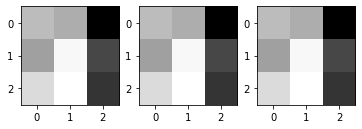

In [81]:
filter_num = 3
multi_weight = np.stack((weight, weight, weight), axis = 3)
multi_weight = multi_weight.reshape((2, 2, 3, filter_num))
multi_weight_init = tf.constant_initializer(multi_weight)
conv2d_mult = keras.layers.Conv2D(filters = filter_num, kernel_size = 2, padding = 'SAME', 
                                 kernel_initializer = multi_weight_init)(multi_channel_image)
feature_maps = np.swapaxes(conv2d_mult, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [7]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [8]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [9]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [11]:
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

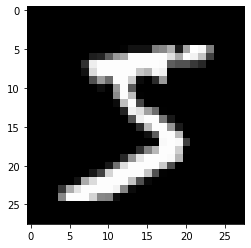

In [12]:
img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

(1, 14, 14, 5)


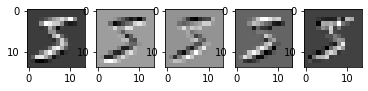

In [13]:
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)
weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img)
print(conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


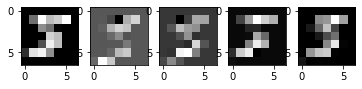

In [14]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

## Max pooling 을 주로 쓴다. 
아무래도, 가장 큰 영향을 준 값일 수록 값이 클 것이기 때문에, max pooling을 주로 쓴다고 함.